In [2]:
#Sarsa is an on policy, sarsa updates Q-values using the Q value of the next state, and the current policy's action (a)
#it estimates the return of state action pairs assuming the current policy continues to be followed. 
import random
from copy import deepcopy
import numpy as np
import gym
import matplotlib
import matplotlib.pyplot as plt

import sys
sys.path.append("./python") 

import Environment # importing the environment made in previous notebook
from FunctionApprox import Q_function, Q_function_count
from Algorithms import Q_learning
from Plotting import plotQ

#### Cliff Environment from the Sutton and Barto Book:  cliff_walking.py file
States = {0,...,33} cells ids <br>
Actions = {UP 0,RIGHT 1,DOWN 2,LEFT 3} <br>
<img style="float: left;" src="imgs/cliff_env.png" width="320">


In [3]:
env = Environment.Environment("CliffWalking")
print("Ini State %d"%env.reset())
env.render()

print("Step: " + str(env.step(0)))
env.render()

print("Step: " + str(env.step(1)))
env.render()

print("Step: " + str(env.step(1)))
env.render()

print("Step: " + str(env.step(2)))
env.render()

Ini State 36
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
x  C  C  C  C  C  C  C  C  C  C  T

Step: [24, -1.0, False, {'prob': 1.0}]
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
x  o  o  o  o  o  o  o  o  o  o  o
o  C  C  C  C  C  C  C  C  C  C  T

Step: [25, -1.0, False, {'prob': 1.0}]
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  x  o  o  o  o  o  o  o  o  o  o
o  C  C  C  C  C  C  C  C  C  C  T

Step: [26, -1.0, False, {'prob': 1.0}]
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  o  x  o  o  o  o  o  o  o  o  o
o  C  C  C  C  C  C  C  C  C  C  T

Step: [38, -100.0, True, {'prob': 1.0}]
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  C  x  C  C  C  C  C  C  C  C  T



In [4]:
def policy(state, epsilon, q_values):
    if random.uniform(0, 1) < epsilon:
        return env.action_space.sample()   # Explore action space
    else:
        return np.argmax(q_values)

    #Here we are defining the parameters so that we can run sarsa. Sarsa is a way to find the policy(the agent's strategy)
def SARSA_learning(env, params, q):
    learning_rate, discount_factor, num_episodes, num_episodes_end  = params

    np.random.seed() 
    
    for i_episode in range(num_episodes):
        
        #The epsilon stops the agent from being too greedy, which causes our agent to explore
        epsilon = max(5 - (1/num_episodes_end) * i_episode, 0)        
        
        #the observation that the agent makes each time after the environment resets. 
        state = env.reset()
        action = policy(state, epsilon, q.predict(state))
                     
        done = False
        while done != True:
            #q values are the action taken per state, which is calcuted using the total discounted reward 
            q_values = q.predict(state)    
            
            next_state, reward, done, info = env.step(action)  
            next_action = policy(next_state, epsilon, q_values)
            next_q_value = q.predict(next_state)[next_action]
            
            #TD Target is a bias estimate of the value function.
            td_target = q_values[action] + learning_rate * (reward + discount_factor * next_q_value - q_values[action])   
            q.update(state, action, td_target)
            
            state = next_state
            action = next_action            
                                    
    env.close()
    return  

In [5]:
#my atempt to write my own Sarsa learning function
q_func = Q_function_count(env)
SARSA_learning(env, [0.1,1,5000,4000], q_func)

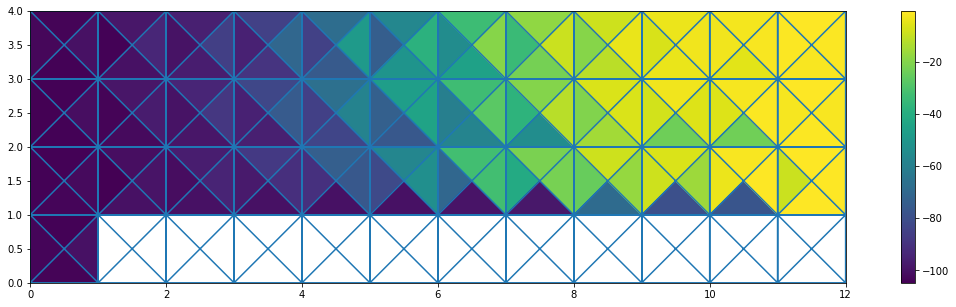

In [6]:
plotQ(env,q_func,mask_visits=True)


In [7]:
env = Environment.Environment("CliffWalking")
q_func = Q_function_count(env)
Q_learning(env, [0.1,1,5000,4000], q_func)

0  Starting learning running  5000  episodes plotting every  500  episodes
500  epsilon:  0.88    Mean Reward:  -111.82
1000  epsilon:  0.75    Mean Reward:  -110.024
1500  epsilon:  0.62    Mean Reward:  -102.354
2000  epsilon:  0.5    Mean Reward:  -95.154
2500  epsilon:  0.38    Mean Reward:  -84.448
3000  epsilon:  0.25    Mean Reward:  -73.168
3500  epsilon:  0.12    Mean Reward:  -52.136
4000  epsilon:  0.0    Mean Reward:  -26.906
4500  epsilon:  0    Mean Reward:  -13.0


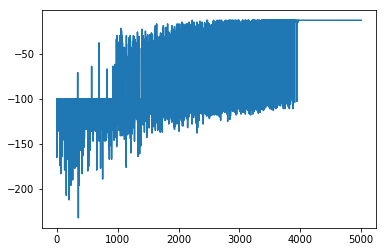

In [8]:
plt.plot(env.history["episode_rew"])

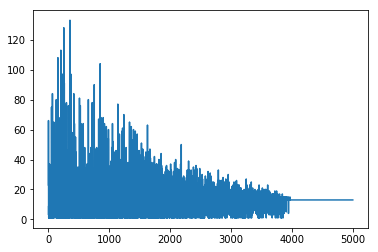

In [9]:
plt.plot(env.history["episode_time"])

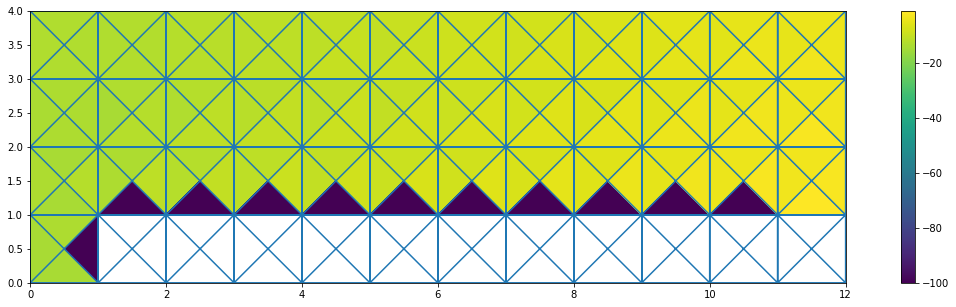

In [10]:
plotQ(env,q_func,mask_visits=True)